In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sys
sys.setrecursionlimit(10 ** 6) 

In [36]:
class Sort:
    '''
    This class contains all the common Sorting algorithms.
    '''
    ##### Quadratic Time Algorithms #####
    
    def bubbleSort(self, data):
        '''
        This function implements Bubble Sort. It sorts the data by swapping the adjacent elements 
        that are not in correct order.
        
        On average Bubble sort takes constant space and quadratic time. But if the data is already sorted, 
        bubble sort works in linear time.
        
        '''
        for i in range(len(data)):
            for j in range(1, len(data)):
                
                if data[j-1] > data[j]:
                    data[j-1], data[j] = data[j], data[j-1]
        return data
    
    def selectionSort(self, data):
        '''
        This function implements Selection Sort. It sorts the data by selecting the lowest value among all values for the
        first index and so on.
        
        On average Selection sort takes constant space and quadratic time. Even if the data is already sorted.
        '''
        for i in range(len(data)):
            k = i
            for j in range(i, len(data)):
                if data[j] < data[k]:
                    k = j
            data[i], data[k] = data[k], data[i]
        return data
    
    def insertionSort(self, data):
        '''
        This function implements insertion Sort. It sorts the data by swapping the already seen values to sort them 
        as we encounter a new value.
        
        On average insertion sort takes constant space and quadratic time. But if the data is already sorted, or nearly sorted 
        insertion sort works in linear time.
        '''
        for i in range(1, len(data)):
            j = i - 1
            while data[i] < data[j] and j >= 0:
                data[j], data[i] = data[i], data[j]
                i = j 
                j = j - 1
        return data
    
    ##### Log Linear Time Algorithms (Divide and Conquer algorithms)#####
    
    ## Merge Sort Begins##
    def mergeSort(self, data):
        '''
        This function implements merge Sort. It sorts the data breaking it down into sublists of one element each 
        and then merging them together in sorted fashion.
        
        On average merge  sort takes linear space and log linear time. 
        '''
        if len(data) == 1:
            return data
        else:
            left, right = data[:int(len(data)/2)], data[int(len(data)/2):]
            return self.merge(self.mergeSort(left), self.mergeSort(right))
    
    def merge(self, left, right):
        '''
        A helper function that implements the merge operation for merge sort.
        '''
        out = []
        while left != [] and right != []:
            if left[0] < right[0]:
                out.append(left[0])
                left = left[1:]
            else:
                out.append(right[0])
                right = right[1:]
        if right:
            out.extend(right)
        if left:
            out.extend(left)
        return out
    
    ## Merge Sort Ends##
    
    ## Quick Sort Begins ##
    
    def quickSort(self, data):
        '''
        This function implements quick Sort. It sorts the data breaking it down into partitions using a particular index as pivot.
        
        On average quicksort takes linear space and log linear time. If the data is already sorted it will perform in quadratic time.
        '''
        low, high = 0, len(data) - 1
        sortedData = self.helperQuickSort(data, low, high)
        return sortedData

    def helperQuickSort(self, data, low, high):
        '''
        An helper function for quick sort
        '''
        if low < high:
            mid = self.partition(data, low, high)
            self.helperQuickSort(data, low, mid - 1)
            self.helperQuickSort(data, mid + 1, high)
        return data
    
    def partition(self, data, low, high):
        '''
        This function implements the partition opertion and returns the partition point. 
        '''
        i, j, pivot = low, high, low
        while i < j:
#             print(i, j, pivot, data, len(data))
            while data[i] <= data[pivot]:
                i += 1
                if i == len(data) - 1:
                    break
            
            while data[j] > data[pivot]:
                j -= 1
                if j == 0:
                    break
            
            if i < j:
                data[i], data[j] = data[j], data[i]
        data[pivot], data[j] = data[j], data[pivot]
        return j
     ## Quick Sort Ends ##
    

#### Testing with simple data 

In [37]:
sort = Sort()
sort.bubbleSort([1, 8, 10, 4, 2, 5])

[1, 2, 4, 5, 8, 10]

In [38]:
sort.selectionSort([1, 8, 10, 4, 2, 5])

[1, 2, 4, 5, 8, 10]

In [39]:
sort.insertionSort([1, 8, 10, 4, 2, 5])

[1, 2, 4, 5, 8, 10]

In [40]:
sort.mergeSort([1, 8, 10, 4, 2, 5])

[1, 2, 4, 5, 8, 10]

In [41]:
sort.quickSort([1, 8, 10, 4, 2, 5])

[1, 2, 4, 5, 8, 10]

#### Creating the same randomly generated data for each sort

In [42]:
timeDict = {'BubbleSort' : [],
           'SelectionSort' : [],
           'InsertionSort' : [],
           'MergeSort' : [],
           'QuickSort' : []}

functionDict = {'BubbleSort' : sort.bubbleSort,
           'SelectionSort' : sort.selectionSort,
           'InsertionSort' : sort.insertionSort,
           'MergeSort' : sort.mergeSort,
           'QuickSort' : sort.quickSort}

In [43]:
for i in range(5):
    sizes = [100, 500, 1000, 5000, 10000]
    if i < 5:
        ## taking in random data ##
        for key in functionDict.keys():
            start = time.time()
            np.random.seed(0)
            random = np.random.randint(0, 1000, sizes[i]).tolist()
            out = functionDict[key](random)
            end = time.time()
            timeDict[key].append(round(end - start, 4))

        

In [44]:
timeDict['Size'] = [100, 500, 1000, 5000, 10000]

In [45]:
timeDict

{'BubbleSort': [0.0, 0.0157, 0.1085, 2.4325, 10.0397],
 'SelectionSort': [0.0, 0.0156, 0.0239, 0.6517, 2.4662],
 'InsertionSort': [0.0, 0.0, 0.0339, 0.9052, 5.0375],
 'MergeSort': [0.0, 0.0, 0.004, 0.0429, 0.1421],
 'QuickSort': [0.0, 0.0, 0.003, 0.017, 0.0469],
 'Size': [100, 500, 1000, 5000, 10000]}

In [46]:
timeDF = pd.DataFrame.from_dict(timeDict).set_index('Size')

In [47]:
timeDF.head()

,BubbleSort,SelectionSort,InsertionSort,MergeSort,QuickSort
Size,,,,,
100,0.0000,0.0000,0.0000,0.0000,0.0000
500,0.0157,0.0156,0.0000,0.0000,0.0000
1000,0.1085,0.0239,0.0339,0.0040,0.0030
5000,2.4325,0.6517,0.9052,0.0429,0.0170
10000,10.0397,2.4662,5.0375,0.1421,0.0469


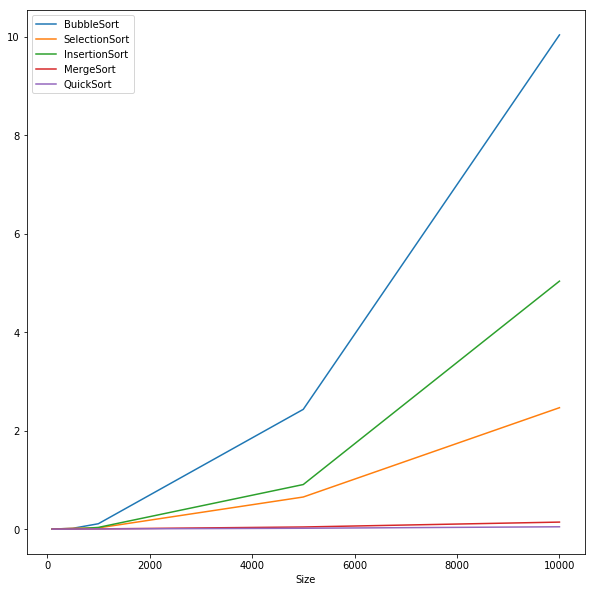

In [48]:
timeDF.plot(figsize = [10, 10])